# Exploración del Dataset

Este notebook proporciona información sobre cada .csv del dataset, contestando a estas preguntas:

- ¿Qué nos proporciona este archivo?
- ¿Qué columnas no son importantes para predicciones?
- ¿Qué predicciones puede ayudar a construir este archivo?

La estructura de este dataset és el siguiente:

- circuits.csv
- constructor_results.csv
- constructor_standings.csv 
- constructors.csv
- driver_standings.csv
- drivers.csv
- lap_times.csv
- pit_stops.csv
- qualifying.csv
- races.csv
- results.csv
- seasons.csv 
- sprint_results.csv
- status.csv

In [31]:
#Importar liberías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Circuits.csv

In [32]:
circuits_data = pd.read_csv('../data/original/circuits.csv')

print("Primeras 5 filas:")
display(circuits_data.head())

print("\nColumnas: ")
print(circuits_data.columns.tolist())

print(f"Registros: {circuits_data.shape[0]}")
print(f"Columnas: {circuits_data.shape[1]}")


Primeras 5 filas:


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park



Columnas: 
['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'alt', 'url']
Registros: 77
Columnas: 9


### Análisis del archivo `circuits.csv`

1. ¿Qué nos proporciona este archivo?

Este archivo contiene información geográfica y descriptiva de cada circuito en el campeonato de F1.

La columnas principales són:
- `circuitId`: ID único del circuito
- `circuitRef`: Nombre simplificado del circuito
- `name`: Nombre del circuito
- `location`: Ciudad o región del circuito
- `country`: País
- `lat`, `lng`: Coordenadas geográficas
- `alt`: Altitud del circuito
- `url`: Enlace a Wikipedia

2. ¿Qué columnas son importantes para predicciones?

Las columnas importantes en este dataset són:
- `circuitId`: ID del circuito
- `country`: País del circuito
- `alt`, `lat`, `lng`: Útiles por si:
    - Altitud afecta el comportamiento del coche?
    - Latitud o país podría ser útil por el clima.

3. ¿Qué predicciones se pueden hacer?

Este archivo lo utilizaré solo para enriquerecer el dataset de entrenamiento.

## Constructor_results.csv

Primeras 5 filas:


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N



Columnas: 
['constructorResultsId', 'raceId', 'constructorId', 'points', 'status']
Registros: 12625


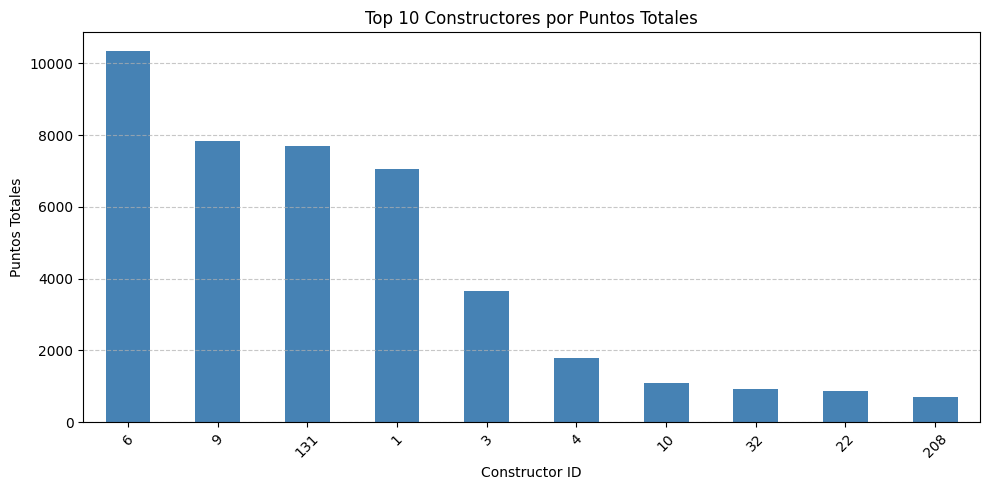


Status únicos:
['\\N' 'D']


In [33]:
constructor_results = pd.read_csv('../data/original/constructor_results.csv')

print("Primeras 5 filas:")
display(constructor_results.head())

print("\nColumnas: ")
print(constructor_results.columns.tolist())

print(f"Registros: {constructor_results.shape[0]}")

#Distribución de puntos por constructor
top_n = 10
points_by_constructor = constructor_results.groupby('constructorId')['points'].sum().sort_values(ascending=False)
top_constructors = points_by_constructor.head(top_n)

plt.figure(figsize=(10, 5))
top_constructors.plot(kind='bar', color='steelblue')
plt.title(f'Top {top_n} Constructores por Puntos Totales')
plt.xlabel('Constructor ID')
plt.ylabel('Puntos Totales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Estados
print("\nStatus únicos:")
print(constructor_results['status'].unique())

### Anàlisis del archivo `constructor_results.csv`

1. ¿Qué nos proporciona este archivo?

Este archivo contiene los resultados por carrera para cada constructor, con información clave:

- `constructorResultsId`: ID único del resultado
- `raceId`: ID de la carrera
- `constructorId`: ID del constructor
- `points`: Puntos obtenidos
- `status`: Estado del resultado (hay nulos o vacíos)

2. ¿Qué columnas son importantes para predicciones?

- `raceId` y `constructorId`: Foreigns Keys para otros datasets
- `points`: Variable objetivo
- `status`: Si se completa, ayuda a saber si el coche terminó

3. ¿Qué predicciones se pueden hacer?

Archivo fundamental para modelar el **rendimiento de cada escudería.**

- Predicción de puntos por constructor en una carrera.
- Comparar que escudería tiene mejor rendimiento por circuito


## Constructor_standings.csv

In [34]:
standings = pd.read_csv('../data/original/constructor_standings.csv')
print("Primeras 5 filas:")
display(standings.head())
print("\nColumnas: ")

print(standings.columns.tolist())
print(f"Registros: {standings.shape[0]}")
print(f"Columnas: {standings.shape[1]}")

Primeras 5 filas:


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0



Columnas: 
['constructorStandingsId', 'raceId', 'constructorId', 'points', 'position', 'positionText', 'wins']
Registros: 13391
Columnas: 7


### Anàlisis archivo `constructor_standing.csv`

1. ¿Qué nos proporciona este archivo?

Este dataset ofrece la clasificación de constructores tras cada carrera, es decir, cómo se posiciona cada escudería en el campeonate de constructores en un momento dado.

Las columnas principales son:

- `constructorStandingsId`: ID único del registro de clasificación.
- `raceId`: ID de la carrera
- `constructorId`: ID de la escudería
- `points`: Puntos acumulados del cosntructor
- `position`: Posición numérica
- `positionText`: Respresentación textual
- `wins`: Total de victorias del constructor hasta esa carrera

2. ¿Qué columnas son importantes?

- `raceId` y `constructorId`: Foreign keys hacia otras tablas
- `points`: Reflejan el rendimiento acumulado
- `position`: Posición del constructor en el campeonato
- `wins`: Número de victorias totales.

3. ¿Qué predicciones se pueden hacer?

- Classificación final de constructores al final de la temporada.
- Probabilidad de que un constructor gane el campeonato
- Proyección de puntos en carreras futuras.
- Análisis de evolución en el campeonato carrera a carrera.

## Constructors & Drivers .csv

In [35]:
constructors = pd.read_csv('../data/original/constructors.csv')
print("Primeras 5 filas:")
display(constructors.head())
print("\nColumnas: ")
print(constructors.columns.tolist())
print(f"Registros: {constructors.shape[0]}")
print(f"Columnas: {constructors.shape[1]}")

drivers = pd.read_csv('../data/original/drivers.csv')
print("Primeras 5 filas:")
display(drivers.head())
print("\nColumnas: ")
print(drivers.columns.tolist())
print(f"Registros: {drivers.shape[0]}")
print(f"Columnas: {drivers.shape[1]}")


Primeras 5 filas:


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso



Columnas: 
['constructorId', 'constructorRef', 'name', 'nationality', 'url']
Registros: 212
Columnas: 5
Primeras 5 filas:


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen



Columnas: 
['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url']
Registros: 861
Columnas: 9


### Anàlisis

Estos dataset són informativos sobre todas las escuderías y pilotos que hay.

## Lap_times.csv

Primeras 5 filas:


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342



Columnas: 
['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds']
Registros: 589081
Columnas: 6


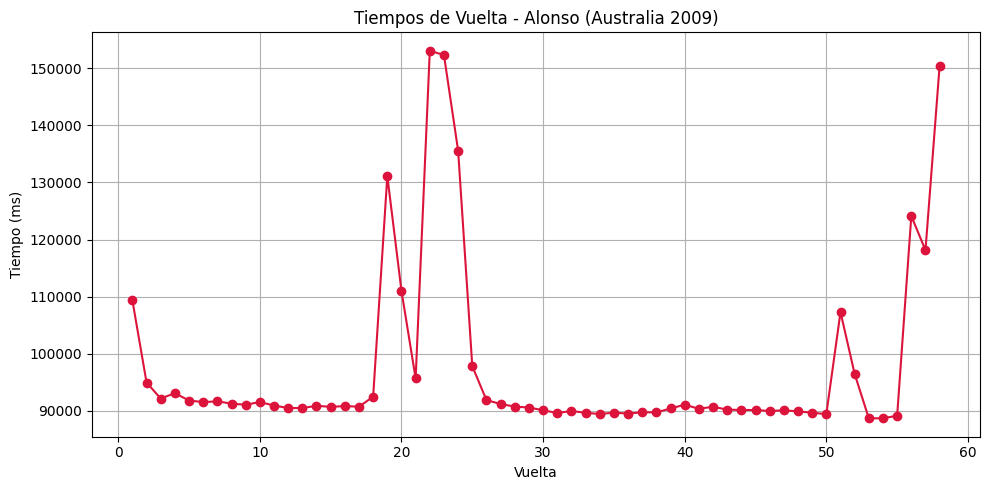

In [36]:
lap_times = pd.read_csv('../data/original/lap_times.csv')
print("Primeras 5 filas:")
display(lap_times.head())
print("\nColumnas: ")
print(lap_times.columns.tolist())
print(f"Registros: {lap_times.shape[0]}")
print(f"Columnas: {lap_times.shape[1]}")

#Tiempos de vuelta de Alonso en Australia
driver_id = 4 #Alonso
race_id = 1 #Australia 2009
laps = lap_times[(lap_times['driverId'] == driver_id) & (lap_times['raceId'] == race_id)]

plt.figure(figsize=(10,5))
plt.plot(laps['lap'], laps['milliseconds'], marker='o', linestyle='-', color='crimson')
plt.title('Tiempos de Vuelta - Alonso (Australia 2009)')
plt.xlabel('Vuelta')
plt.ylabel('Tiempo (ms)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Anàlis archivo `lap_times.csv`

1. ¿Qué nos proporciona este archivo?

Contiene los tiempos por vuelta de cada pilota en cada carrera. Visualiza el rendimiento en carrera, consistencia, estrategias de ritmo...

Importante decir que la columna `milliseconds` es para cálculos i la columna `time` es solo textual.

2. ¿Qué columnas son importantes para predicciones?

- `milliseconds`: Permite trabajar numéricamente
- `lap`: Útil para la evolución de ritmo
- `position`: Ayuda a saber si el piloto estaba en tràfico, liderando...

3. ¿Qué predicciones se pueden hacer?

- Tiempo de vuelta estimado en una vuelta dada
- Detección de undercat/overcut
- Clasificar stints y degradación
- Predicción del rendimiento en carrera